In [1]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('ml_data_variable.csv')

# extract the independent variables (X) and dependent variable (y)
X = data[['COAL, Thousand Short Tons', 'NATURALGAS, Billion Cubic Feet', 'ELECTRICITY, Million Kilowatthours',
         'PETRO_INDUSTRIAL, Thousand Barrels per Day', 'PETRO_RESIDENTIAL_COMMERCIAL, Thousand Barrels per Day',
         'PETRO_TRANSPORTATION_ELECTRICPOWER, Thousand Barrels per Day']]
y = data['CO2, Million Metric Tons']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# Print the number of estimators (trees) in the random forest
n_estimators = model.n_estimators
print("Number of Estimators (Trees):", n_estimators)


Number of Estimators (Trees): 1000


R² (Training): 0.9940681796444796
###########################################################################
R²: 0.95
Mean Absolute Error: 8.07
Mean Squared Error: 102.81
Root Mean Squared Error: 10.14


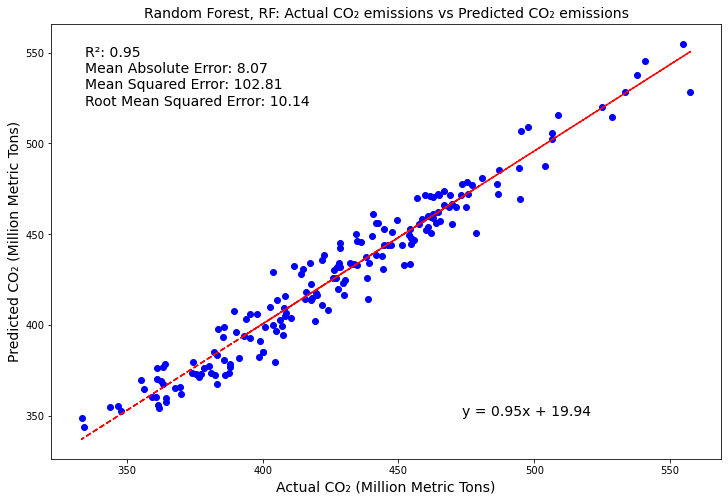

In [3]:


# Create and train the Random Forest model
#rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

#rf_classifier.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)


# Make predictions on the training data
y_pred_train = rf_regressor.predict(X_train)

# Calculate the R-squared score for the training data
r2_train = r2_score(y_train, y_pred_train)
print("R² (Training):", r2_train)

print('###########################################################################')

y_pred = rf_regressor.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print("R²:", format(r2, ".2f"))
print("Mean Absolute Error:", format(mae, ".2f"))
print("Mean Squared Error:", format(mse, ".2f"))
print("Root Mean Squared Error:", format(rmse, ".2f"))

# Calculate statistical parameters
correlation = np.corrcoef(y_test, y_pred)[0, 1]
r_squared = np.square(correlation)

# Perform linear regression to get the line equation
slope, intercept = np.polyfit(y_test, y_pred, 1)

# Add the equation as text on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Fit a linear regression line
trendline = np.polyfit(y_test, y_pred, 1)
trendline_fn = np.poly1d(trendline)


plt.figure(figsize=(12, 8))  # Specify the width and height in inches

# Plot Actual vs Predicted values with trend line
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, trendline_fn(y_test), color='red', linestyle='--')
plt.xlabel('Actual CO₂ (Million Metric Tons)', fontsize=14)
plt.ylabel('Predicted CO₂ (Million Metric Tons)', fontsize=14)
plt.title('Random Forest, RF: Actual CO₂ emissions vs Predicted CO₂ emissions', fontsize=14)

# Annotate statistical parameters on the plot
#textstr = f'Correlation coefficient: {correlation:.2f}\nR-squared: {r_squared:.2f}'
textstr = f'R²: {format(r2, ".2f")}\nMean Absolute Error: {format(mae, ".2f")}\nMean Squared Error: {format(mse, ".2f")}\nRoot Mean Squared Error: {format(rmse, ".2f")}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top', fontsize=14)
plt.text(0.6, 0.2, equation, transform=plt.gcf().transFigure, fontsize=14)
plt.savefig('Random Forest Actual CO₂ emissions vs Predicted CO₂ emissions.jpg')
plt.show()


Variable: COAL, Thousand Short Tons
Sensitivity: 0.90, R² (Modified): 0.8064
Sensitivity: 0.95, R² (Modified): 0.9125
Sensitivity: 1.00, R² (Modified): 0.9513
Sensitivity: 1.05, R² (Modified): 0.9276
Sensitivity: 1.10, R² (Modified): 0.8361

Variable: NATURALGAS, Billion Cubic Feet
Sensitivity: 0.90, R² (Modified): 0.9129
Sensitivity: 0.95, R² (Modified): 0.9428
Sensitivity: 1.00, R² (Modified): 0.9513
Sensitivity: 1.05, R² (Modified): 0.9466
Sensitivity: 1.10, R² (Modified): 0.9209

Variable: ELECTRICITY, Million Kilowatthours
Sensitivity: 0.90, R² (Modified): 0.9439
Sensitivity: 0.95, R² (Modified): 0.9488
Sensitivity: 1.00, R² (Modified): 0.9513
Sensitivity: 1.05, R² (Modified): 0.9497
Sensitivity: 1.10, R² (Modified): 0.9470

Variable: PETRO_INDUSTRIAL, Thousand Barrels per Day
Sensitivity: 0.90, R² (Modified): 0.9384
Sensitivity: 0.95, R² (Modified): 0.9493
Sensitivity: 1.00, R² (Modified): 0.9513
Sensitivity: 1.05, R² (Modified): 0.9479
Sensitivity: 1.10, R² (Modified): 0.9415

V

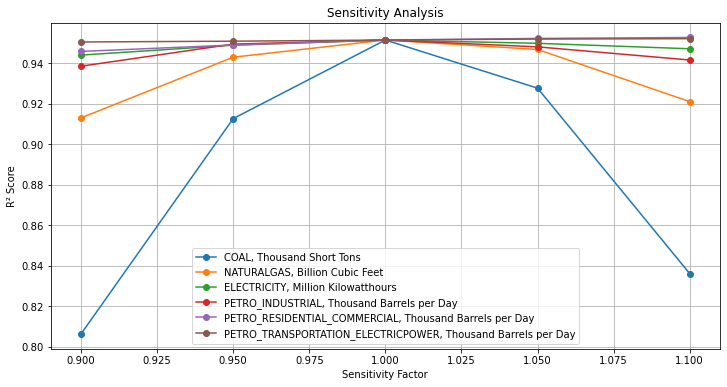

In [4]:
# Define the variables to analyze for sensitivity
variables_to_analyze = ['COAL, Thousand Short Tons', 'NATURALGAS, Billion Cubic Feet', 'ELECTRICITY, Million Kilowatthours',
                        'PETRO_INDUSTRIAL, Thousand Barrels per Day', 'PETRO_RESIDENTIAL_COMMERCIAL, Thousand Barrels per Day',
                        'PETRO_TRANSPORTATION_ELECTRICPOWER, Thousand Barrels per Day']

# Initialize a dictionary to store sensitivity analysis results
sensitivity_results = {}

# Iterate over the variables for sensitivity analysis
for variable_name in variables_to_analyze:
    # Get the original values of the selected variable
    original_values = X_test[variable_name].copy()

    # Initialize a list to store sensitivity analysis results for the current variable
    variable_sensitivity_results = []

    # Iterate over different sensitivities (e.g., increase by 10%)
    for sensitivity in [0.9, 0.95, 1.0, 1.05, 1.1]:
        # Modify the values of the selected variable
        modified_values = original_values * sensitivity
        X_test_modified = X_test.copy()
        X_test_modified[variable_name] = modified_values

        # Make predictions using the modified dataset
        y_pred_modified = rf_regressor.predict(X_test_modified)

        # Calculate the R-squared score for the modified predictions
        r2_modified = r2_score(y_test, y_pred_modified)

        # Store the sensitivity analysis results
        variable_sensitivity_results.append((sensitivity, r2_modified))

    # Store the sensitivity analysis results for the current variable in the dictionary
    sensitivity_results[variable_name] = variable_sensitivity_results

# Print the sensitivity analysis results
for variable_name, results in sensitivity_results.items():
    print(f"Variable: {variable_name}")
    for sensitivity, r2_modified in results:
        print(f"Sensitivity: {sensitivity:.2f}, R² (Modified): {r2_modified:.4f}")
    print()

# Plot the sensitivity analysis results for each variable
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed

for variable_name, results in sensitivity_results.items():
    sensitivity_factors = [result[0] for result in results]
    r2_scores = [result[1] for result in results]
    plt.plot(sensitivity_factors, r2_scores, marker='o', linestyle='-', label=variable_name)

plt.xlabel('Sensitivity Factor')
plt.ylabel('R² Score')
plt.title('Sensitivity Analysis')
plt.legend()
plt.grid(True)
plt.show()


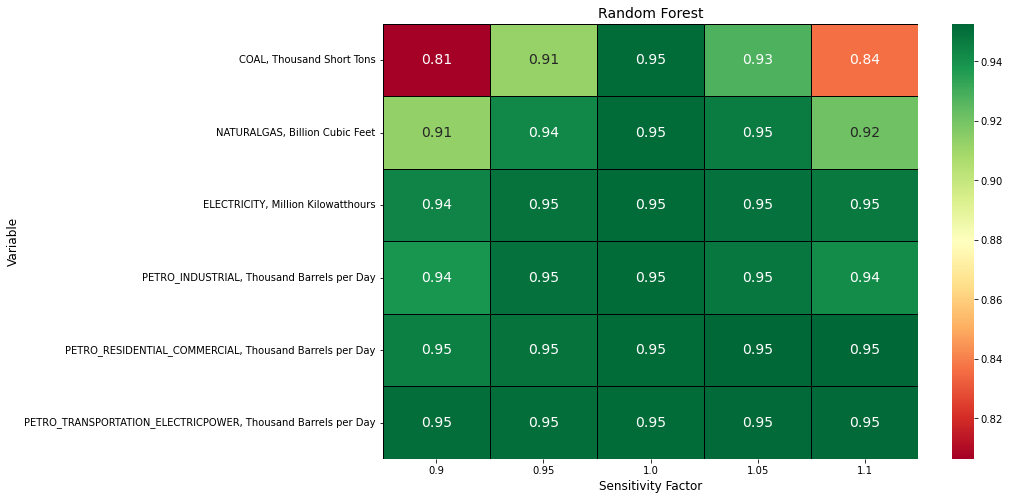

In [5]:

# Define the variables to analyze for sensitivity
variables_to_analyze = ['COAL, Thousand Short Tons', 'NATURALGAS, Billion Cubic Feet', 'ELECTRICITY, Million Kilowatthours',
                        'PETRO_INDUSTRIAL, Thousand Barrels per Day', 'PETRO_RESIDENTIAL_COMMERCIAL, Thousand Barrels per Day',
                        'PETRO_TRANSPORTATION_ELECTRICPOWER, Thousand Barrels per Day']

# Initialize a dictionary to store sensitivity analysis results
sensitivity_results = {}

# Iterate over the variables for sensitivity analysis
for variable_name in variables_to_analyze:
    # Get the original values of the selected variable
    original_values = X_test[variable_name].copy()

    # Initialize a list to store sensitivity analysis results for the current variable
    variable_sensitivity_results = []

    # Iterate over different sensitivities (e.g., increase by 10%)
    for sensitivity in [0.9, 0.95, 1.0, 1.05, 1.1]:
        # Modify the values of the selected variable
        modified_values = original_values * sensitivity
        X_test_modified = X_test.copy()
        X_test_modified[variable_name] = modified_values

        # Make predictions using the modified dataset
        y_pred_modified = rf_regressor.predict(X_test_modified)

        # Calculate the R-squared score for the modified predictions
        r2_modified = r2_score(y_test, y_pred_modified)

        # Store the sensitivity analysis results
        variable_sensitivity_results.append(r2_modified)

    # Store the sensitivity analysis results for the current variable in the dictionary
    sensitivity_results[variable_name] = variable_sensitivity_results

# Create a matrix of sensitivity analysis results
sensitivity_matrix = np.array([sensitivity_results[variable] for variable in variables_to_analyze])

# Create a heatmap to visualize the sensitivity analysis results
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed

sns.heatmap(sensitivity_matrix, cmap='RdYlGn', annot=True, fmt='.2f', annot_kws={'fontsize': 14},
            xticklabels=[0.9, 0.95, 1.0, 1.05, 1.1], yticklabels=variables_to_analyze,
            linewidths=0.5, linecolor='black')

plt.xlabel('Sensitivity Factor', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.title('Random Forest', fontsize=14)
plt.savefig('Random Forest Sensitivity Analysis.jpg', dpi=300, bbox_inches='tight')
'Sensitivity Analysis of different machine learning methods: Changes in the R² when the selected variable is perturbed'
plt.show()
